<a href="https://colab.research.google.com/github/PavelNovikov888/classification_NBC/blob/master/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D1%85_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Сравнение линейных байесовских регрессоров(Linear Bayesian Regressors)

В этом примере сравниваются два разных байесовских регрессора:

- automatic_relevance_determination(ARD автоматическое_определение_релевантности)
- bayesian_ridge_regression(байесова_ридж_регрессия)
В первой части мы используем модель «обычные_наименьшие_квадраты» (OLS ordinary_least_squares) в качестве основы(baseline) для сравнения коэффициентов моделей с истинными коэффициентами.

После этого мы покажем, что оценка таких моделей осуществляется путем итеративной максимизации предельного логарифмического правдоподобия наблюдений.

В последнем разделе мы строим прогнозы и неопределенности для регрессий ARD и Bayesian Ridge regressions, используя полиномиальное расширение признаков, чтобы соответствовать нелинейной зависимости между X и y.

## Способность моделей восстанавливать истинные веса.

### Создадим синтетический набор данных

Мы генерируем набор данных, в котором «X» и «y» линейно связаны: 10
признаков `X` будут использоваться для генерации `y`.  
Остальные признаки не используются при предсказании `y`.   
Кроме того, мы генерируем набор данных, в котором `n_samples == n_features`.
Такая постановка задачи является сложной для модели OLS и потенциально приводит к произвольно большим весам.
Наличие приоритета на веса и штрафа снимает эту проблему.
Наконец, добавляется гауссовский шум.


## Models robustness to recover the ground truth weights

### Generate synthetic dataset

We generate a dataset where `X` and `y` are linearly linked: 10 of the
features of `X` will be used to generate `y`. The other features are not
useful at predicting `y`. In addition, we generate a dataset where `n_samples
== n_features`. Such a setting is challenging for an OLS model and leads
potentially to arbitrary large weights. Having a prior on the weights and a
penalty alleviates the problem. Finally, gaussian noise is added.



In [ ]:
from sklearn.datasets import make_regression

# создадим случайную задачу регрессии
X, y, true_weights = make_regression(
    # количество наблюдений
    n_samples=100,
    # количество признаков
    n_features=100,
    # количество признаков, использованных для построения линейной модели, используемой для генерации выходных данных.
    n_informative=10,
    # стандартное отклонение гауссова шума
    noise=8,
    # если True, возвращаются коэффициенты базовой линейной модели
    coef=True,
    random_state=42,
)

In [ ]:
true_weights

array([ 0.        ,  0.        ,  0.        ,  0.        , 32.12551734,
       33.6926875 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  5.16621758,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       75.31997019,  0.        ,  0.        ,  0.        , 58.28693612,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 76.33080772,  0.        ,  7.18075454,  0.  

### Обучим модели

Обучим как байесовские модели, так и OLS, чтобы позже сравнить коэффициенты моделей.



In [ ]:
import pandas as pd

from sklearn.linear_model import ARDRegression, BayesianRidge, LinearRegression

olr = LinearRegression().fit(X, y)
brr = BayesianRidge(compute_score=True, n_iter=30).fit(X, y)
ard = ARDRegression(compute_score=True, n_iter=30).fit(X, y)
df = pd.DataFrame(
    {
        "Weights of true generative process": true_weights,
        "ARDRegression": ard.coef_,
        "BayesianRidge": brr.coef_,
        "LinearRegression": olr.coef_,
    }
)

In [ ]:
df.head(10)

,Weights of true generative process,ARDRegression,BayesianRidge,LinearRegression
0,0.000000,-0.590226,-0.631933,3.769189
1,0.000000,-0.001504,-3.250621,-2.588350
2,0.000000,-0.000594,-2.509021,-5.446821
3,0.000000,-0.000171,2.541967,7.323519
4,32.125517,33.179873,34.489623,37.137168
5,33.692687,33.982076,33.548580,32.370179
6,0.000000,0.000126,1.433299,4.664945
7,0.000000,-0.001092,6.856054,13.232605
8,0.000000,-0.001115,8.523237,11.769443
9,0.000000,0.004937,5.035510,9.682524


### Визуализируем истинные и расчетные коэффициенты

Сравним коэффициенты каждой модели с весами истинной генеративной модели.



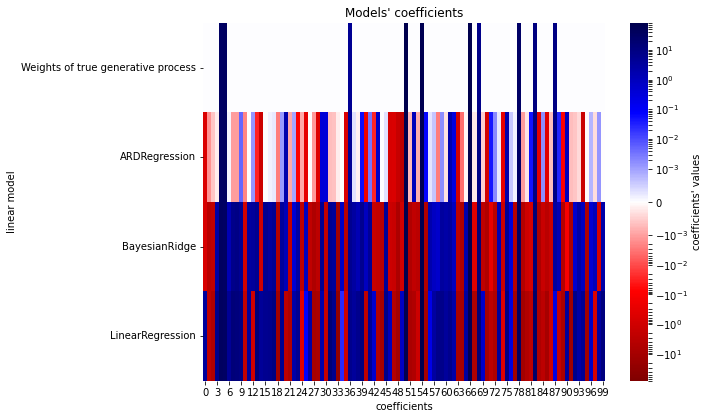

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import SymLogNorm

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df.T,
    norm=SymLogNorm(linthresh=10e-4, vmin=-80, vmax=80),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.ylabel("linear model")
plt.xlabel("coefficients")
plt.tight_layout(rect=(0, 0, 1, 0.95))
_ = plt.title("Models' coefficients")

Из -за добавленного шума ни одна из моделей не восстанавливает истинные веса.
 Действительно, все модели всегда имеют более 10 ненулевых коэффициентов.   
 По сравнению с OLS-оценкой коэффициенты, полученные с помощью байесовской регрессии, немного смещены к нулю, что стабилизирует их

  Регрессия ARD дает более компактное решение: некоторые неинформативные коэффициенты устанавливаются точно в ноль, а другие сдвигаются ближе к нулю.  
  При этом некоторые неинформативные коэффициенты все равно присутствуют и сохраняют большие значения

 Due to the added noise, none of the models recover the true weights. Indeed, all models always have more than 10 non-zero coefficients. Compared to the OLS estimator, the coefficients using a Bayesian Ridge regression are slightly shifted toward zero, which stabilises them. The ARD regression provides a sparser solution: some of the non-informative coefficients are set exactly to zero, while shifting others closer to zero. Some non-informative coefficients are still present and retain large values.



### Построим график предельного логарифмического правдоподобия



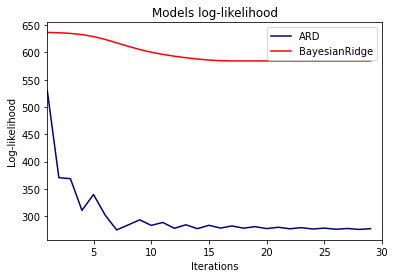

In [ ]:
import numpy as np

ard_scores = -np.array(ard.scores_)
brr_scores = -np.array(brr.scores_)
plt.plot(ard_scores, color="navy", label="ARD")
plt.plot(brr_scores, color="red", label="BayesianRidge")
plt.ylabel("Log-likelihood")
plt.xlabel("Iterations")
plt.xlim(1, 30)
plt.legend()
_ = plt.title("Models log-likelihood")

Действительно, обе модели минимизируют логарифмическое правдоподобие до произвольного отсечения
определяемого параметром `n_iter`.

## Байесовские регрессии с полиномиальным расширением признаков
Генерируем синтетический набор данных
Мы создаем целевой признак, который является нелинейной функцией входного признака.
Добавляется шум, соответствующий стандартному равномерному распределению.

Indeed, both models minimize the log-likelihood up to an arbitrary cutoff
defined by the `n_iter` parameter.

Bayesian regressions with polynomial feature expansion
Generate synthetic dataset
We create a target that is a non-linear function of the input feature.
Noise following a standard uniform distribution is added.



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

rng = np.random.RandomState(0)
n_samples = 110

# Сортируем данные, чтобы облегчить построение позже
X = np.sort(-10 * rng.rand(n_samples) + 10)
noise = rng.normal(0, 1, n_samples) * 1.35
y = np.sqrt(X) * np.sin(X) + noise
full_data = pd.DataFrame({"input_feature": X, "target": y})
X = X.reshape((-1, 1))

# экстраполяция
X_plot = np.linspace(10, 10.4, 10)
y_plot = np.sqrt(X_plot) * np.sin(X_plot)
X_plot = np.concatenate((X, X_plot.reshape((-1, 1))))
y_plot = np.concatenate((y - noise, y_plot))

### Обучим регрессоры

Здесь мы пытаемся использовать полином степени 10, чтобы потенциально получить переобучение, хотя байесовские линейные модели регуляризируют размер коэффициентов полинома.  
   
В качестве
`fit_intercept=True` по умолчанию для
:class:`~sklearn.linear_model.ARDRegression` и
:class:`~sklearn.linear_model.BayesianRidge`, то
:class:`~sklearn.preprocessing.PolynomialFeatures` не должен добавлять дополнительного смещения признака.

Если задать `return_std=True`, то байесовские регрессоры
возвращают стандартное отклонение апостериорного распределения для параметров модели.

Here we try a degree 10 polynomial to potentially overfit, though the bayesian
linear models regularize the size of the polynomial coefficients. As
`fit_intercept=True` by default for
:class:`~sklearn.linear_model.ARDRegression` and
:class:`~sklearn.linear_model.BayesianRidge`, then
:class:`~sklearn.preprocessing.PolynomialFeatures` should not introduce an
additional bias feature. By setting `return_std=True`, the bayesian regressors
return the standard deviation of the posterior distribution for the model
parameters.



In [ ]:
ard_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    ARDRegression(),
).fit(X, y)
brr_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    BayesianRidge(),
).fit(X, y)

y_ard, y_ard_std = ard_poly.predict(X_plot, return_std=True)
y_brr, y_brr_std = brr_poly.predict(X_plot, return_std=True)

### Построение полиномиальных регрессий со стандартными ошибками коэффицентов

Plotting polynomial regressions with std errors of the scores




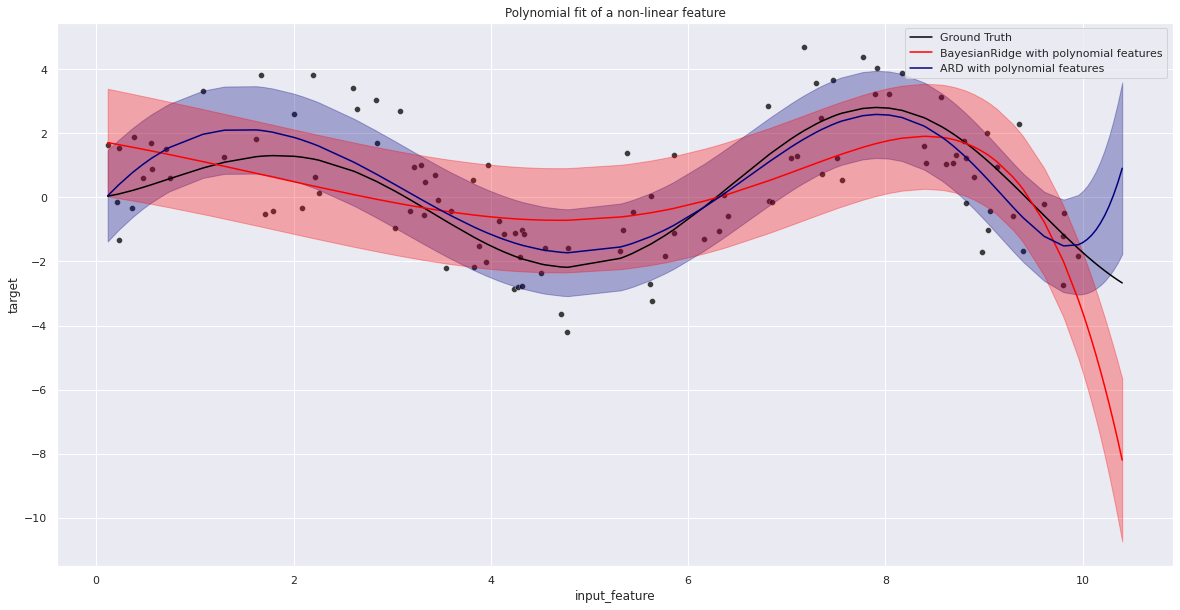

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

ax = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.75
)
ax.plot(X_plot, y_plot, color="black", label="Ground Truth")
ax.plot(X_plot, y_brr, color="red", label="BayesianRidge with polynomial features")
ax.plot(X_plot, y_ard, color="navy", label="ARD with polynomial features")
ax.fill_between(
    X_plot.ravel(),
    y_ard - y_ard_std,
    y_ard + y_ard_std,
    color="navy",
    alpha=0.3,
)
ax.fill_between(
    X_plot.ravel(),
    y_brr - y_brr_std,
    y_brr + y_brr_std,
    color="red",
    alpha=0.3,
)
ax.legend()
_ = ax.set_title("Polynomial fit of a non-linear feature")

Уровни ошибок представляют собой одно стандартное отклонение предсказанного гауссова
распределения точек запроса. Заметим, что регрессия ARD лучше всего отражает истинное положение дел при использовании параметров по умолчанию в обеих моделях. Но дальнейшее уменьшение гиперпараметра `lambda_init` байесовской модели регрессии может уменьшить смещение (см. пример
`sphx_glr_auto_examples_linear_model_plot_bayesian_ridge_curvefit.py`).
Наконец, из-за внутренних ограничений полиномиальной регрессии обе модели не работают при экстраполяции.

The error bars represent one standard deviation of the predicted gaussian
distribution of the query points. Notice that the ARD regression captures the
ground truth the best when using the default parameters in both models, but
further reducing the `lambda_init` hyperparameter of the Bayesian Ridge can
reduce its bias (see example
`sphx_glr_auto_examples_linear_model_plot_bayesian_ridge_curvefit.py`).
Finally, due to the intrinsic limitations of a polynomial regression, both
models fail when extrapolating.

